## TEORÍA

Hiperparámetros más importantes y los primeros en los que centrarse:
- n_estimators (n_estimators en XGBoost): Este es probablemente el hiperparámetro más importante. Define el número de árboles de decisión en el bosque. En general, un número mayor de árboles aumenta la precisión y hace que las predicciones sean más estables, pero también puede ralentizar considerablemente el tiempo de cálculo.
- learning_rate (learning_rate en XGBoost): La tasa a la cual se acepta el modelo en cada etapa de boosting. Una tasa de aprendizaje más elevada puede llevar a un modelo más complejo, mientras que una tasa más baja requerirá más árboles para obtener el mismo nivel de complejidad.
- loss (objective en XGBoost): La función de pérdida a optimizar (cantidad de errores de clasificación o diferencia con la realidad en regresión).
- subsample (subsample en XGBoost): La fracción de instancias a utilizar para entrenar los modelos. Si es menor que 1.0, entonces cada árbol se entrena con una fracción aleatoria del total de las instancias del dataset de entrenamiento.
- max_depth (max_depth en XGBoost): La profundidad máxima de los árboles. Esto es esencialmente cuántas divisiones puede hacer el árbol antes de hacer una predicción.
- min_samples_split (gamma en XGBoost): El número mínimo de muestras necesarias para dividir un nodo en cada árbol. Si se establece un valor alto, evita que el modelo aprenda relaciones demasiado específicas y, por tanto, ayuda a prevenir el sobreajuste.
- min_samples_leaf (min_child_weight en XGBoost): El número mínimo de muestras que se deben tener en un nodo hoja en cada árbol.
- max_features (colsample_by_level en XGBoost): El número máximo de características a considerar al buscar la mejor división dentro de cada árbol. Por ejemplo, si tenemos 10 características, podemos elegir que cada árbol considere solo un subconjunto de ellas al decidir dónde dividir.

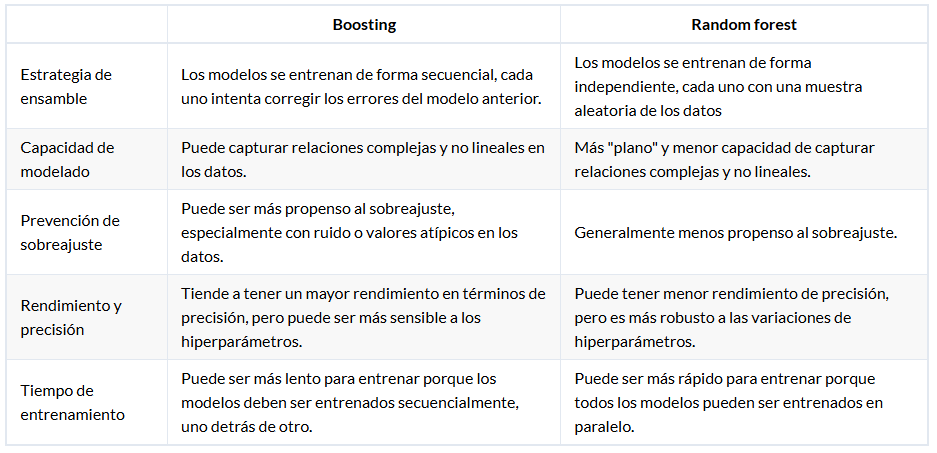

Más o menos indicados según la situación y las características de los datos. Sin embargo, para dejarlo más claro, podemos establecer algunos criterios basados en las características de los datos que podríamos considerar al elegir boosting y random forest:

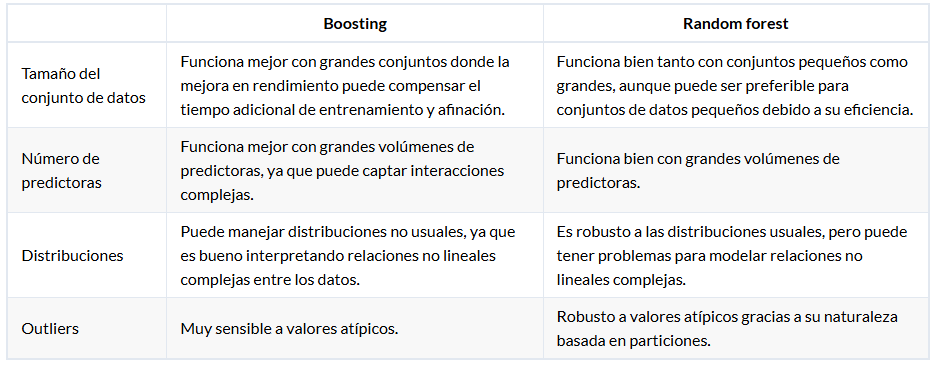

In [55]:
import os
import pandas as pd

# Extraer datos
# no se utiliza en el boosting ninguno más que el dataset sin outliers
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    #"X_train_con_outliers.xlsx"
    "X_train_sin_outliers.xlsx"
]

TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

TEST_PATHS = [
    #"X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx"
]

TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [56]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# crea el modelo, entrena el modelo, guardas el target de train y de test. Sacar la precisión para comparar cual es el mejor de todos
results_accuracy = []

for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = XGBClassifier(random_state = 42)
    model.fit(dataset, y_train)
    
    y_pred_train = model.predict(dataset)   # x_train
    y_pred_test = model.predict(TEST_DATASETS[index])   # x_text

    results_accuracy.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )
 
    # print tiempo que ha tardado
results_accuracy

0


[{'train': 1.0, 'test': 0.6883116883116883}]

Aunque los valores de los con outliers son mejores, en un boosting el problema son los outliers, para evitar que se convierta en una distribución uniforme y obtener unos malos resultados de accuracy y mae en datos nuevos, utilizamos los datasets sin outliers (SIEMPRE que sea boosting)

In [57]:
from sklearn.model_selection import ParameterGrid, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
# Sin outliers sin aplicar feature selection
path_train = "X_train_sin_outliers.xlsx"
path_test = "X_test_sin_outliers.xlsx"
winner_train = pd.read_excel(f"{BASE_PATH}/{path_train}")
winner_test = pd.read_excel(f"{BASE_PATH}/{path_test}")
# Sin outliers aplicando feature selection k = 5
# base_path_assets = "../data/processed/assets" 
# path_train = "clean_without_outliers__train_k_5.csv"
# path_test = "clean_without_outliers__test_k_5.csv"
# winner_train = pd.read_csv(f"{base_path_assets}/{path_train}", sep=",")
# winner_test = pd.read_csv(f"{base_path_assets}/{path_test}", sep=",")

SKLEARN

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# con Sklearn
#model = GradientBoostingClassifier(random_state = 42)
model = XGBClassifier(random_state = 42)
# Definir el grid de hiperparámetros
## PENDIENTE DE LANZAR
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  # Número de árboles en el bosque
    'objective': ['binary:logistic', 'multi:softmax', 'reg:squarederror'],  # o 'reg:squarederror' dependiendo del problema
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],  # Muestra de entrenamiento a usar para cada árbol
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 50],  # Profundidad máxima de los árboles
    'gamma': [0, 1, 5, 10],  # Para control de la complejidad del modelo
    'min_child_weight': [1, 2, 5],  # Peso mínimo de un nodo hijo para ser dividido
    'colsample_bylevel': [0.8, 0.9, 1.0],  # Fracción de características a utilizar por nivel de árbol
    'seed': [42]  # 🔹 la semilla
}

# más corto
# param_grid = {
#     'objective': ['binary:logistic'],  
#     'n_estimators': [10],
#     'learning_rate': [0.1],
#     'max_depth': [6],
#     'subsample': [0.9],
#     'gamma': [1],
#     'min_child_weight': [2],
#     'colsample_bylevel': [0.8],
#     'seed': [42]  # 🔹 la semilla
# }

# GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
train_regularized = grid_search.fit(winner_train, y_train)

final_model = train_regularized.best_estimator_
final_model


In [ ]:
y_pred_train = final_model.predict(winner_train)
accuracy_score(y_pred_train, y_train)

0.8224755700325733

In [ ]:
y_pred_test = final_model.predict(winner_test)
accuracy_score(y_pred_test, y_test)

0.7597402597402597

K=5,

    train: 0.8224755700325733
    test: 0.7597402597402597

XGBOOST

In [ ]:
import xgboost as xgb
import numpy as np



from sklearn.metrics import accuracy_score

# Definir el número de clases si es multiclase
num_classes = len(np.unique(y_train))  

# Convertir etiquetas a enteros si es clasificación multiclase
if num_classes > 2:
    y_train = y_train.astype(int)

# Convertir datos a DMatrix (debe hacerse después de cualquier cambio en y_train)
dtrain = xgb.DMatrix(winner_train, label=y_train)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  
    'objective': ['binary:logistic' if num_classes == 2 else 'multi:softmax'],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],  
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 50],  
    'gamma': [0, 1, 5, 10],  
    'min_child_weight': [1, 2, 5],  
    'colsample_bylevel': [0.8, 0.9, 1.0],  
    'seed': [42]  
}

best_score = float("inf")
best_params = None

# Si quisiera generar combinaciones aleatorias de hiperparámetros ParameterSampler, como quiero hacer una búsqueda exhaustiva de todas ParameterGrid
param_samples = list(ParameterGrid(param_grid)) # ParameterSampler si quieres un número de iteraciones concreto de forma aleatoria

for params in param_samples:
    params = params.copy()
    
    # Asegurar que el número de clases esté definido si es multiclase
    if params['objective'] == 'multi:softmax':
        params['num_class'] = num_classes  

    # Usar métrica correcta
    metric = "mlogloss" if params['objective'] == 'multi:softmax' else "error"

    # Validación cruzada (cross validation)
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=params['n_estimators'],
        nfold=5,
        metrics=metric,  
        early_stopping_rounds=10,
        seed=42
    )
    
    mean_error = np.min(cv_results[f'test-{metric}-mean'])  
    
    if mean_error < best_score:
        best_score = mean_error
        best_params = params

print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo final
final_model_xgboost = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=best_params['n_estimators']
)




Mejores parámetros encontrados: {'colsample_bylevel': 0.8, 'gamma': 10, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 20, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}


In [ ]:
# Convertir los datos de entrada (winner_train) a DMatrix
dtrain_pred = xgb.DMatrix(winner_train)
y_pred_train_xgboost = final_model_xgboost.predict(dtrain_pred) 

# Asegurar que las predicciones sean etiquetas
if best_params['objective'] == 'binary:logistic':
    y_pred_train_xgboost = np.round(y_pred_train_xgboost)

elif best_params['objective'] == 'multi:softprob':
    y_pred_train_xgboost = np.argmax(y_pred_train_xgboost, axis=1)

# Verificar que y_train tiene valores enteros
y_train = y_train.astype(int)

accuracy = accuracy_score(y_train, y_pred_train_xgboost)
print("Accuracy on training set:", accuracy)

Accuracy on training set: 0.7915309446254072


In [ ]:
# Convertir los datos de entrada (winner_train) a DMatrix
dtest_pred = xgb.DMatrix(winner_test)
y_test_xgboost = xgb.DMatrix(y_test)
y_pred_test_xgboost = final_model_xgboost.predict(dtest_pred) 
 # Si es clasificación binaria, redondeamos las predicciones
if best_params['objective'] == 'binary:logistic':
    y_pred_test_xgboost = np.round(y_pred_test_xgboost)
accuracy = accuracy_score(y_test, y_pred_test_xgboost)
print("Accuracy on testing set:", accuracy)

Accuracy on testing set: 0.7792207792207793


train: 0.7915309446254072
test: 0.7792207792207793

Paso 4: Guardado del modelo

In [ ]:
from pickle import dump
base_path = os.getcwd()
model_path_xgboost = "../models/boosting_xgboost_default_42.pkl"
complete_path = os.path.join(base_path, model_path_xgboost)
dump(final_model_xgboost, open(complete_path, "wb"))

model_path_sklearn = "../models/boosting_sklearn_default_42.pkl"
complete_path = os.path.join(base_path, model_path_sklearn)
dump(final_model, open(complete_path, "wb"))

Es probable que estos valores aceptables se deban a los datos. Se decide tomar k=5 y hacer una comparativa ya que en todos es el que presenta mejores resultados tras aplicarle el feature selection, tras encontrar overfitting previamente. Se observa lo siguiente:
- Decission Tree Classifier: Se observa un ligero overfitting, pero con k=5 es el que mejores valores presentaba.
    - Train: 0.8241042345276873
    - Test: 0.7727272727272727
- Random Forest: Pese a encontrarse valores más pequeños que en el Decission Tree Classifier, se analizó el recall score (ratio de verdaderos positivos) y se observa que toma valores altos tanto en train como en test, por lo que se considera correcto. Se escogió el que menos overfitting tenía.
    - Train   0.8175895765472313
    - Test   0.7662337662337663
- Boosting Algorithm: Se observa que al hacerlo con xgboost se encuentran valores aceptables y sin overfitting, pero son mejores que cualquiera de los anteriores (test). Además de ejecutarse más rápido que en modelos anteriores. Por otro lado, se observa que el XGBClassifier + GridSearchCV presenta un ligero overfitting.
    - sklearn (XGBClassifier de xgboost + GridSearchCV):
        - train: 0.8224755700325733
        - test: 0.7597402597402597
    - xgboost:
        - train: 0.7915309446254072
        - test: 0.7792207792207793

Se concluye que debido al dataset se obtienen valores aceptables, pero si en el EDA se hubieran tratado algunas columnas como el BMI o la glucosa para hacer una adición de columnas de variables categóricas, ya que presentaban una mayor correlación con el target, es posible que los modelos hubieran encontrado esos patrones y se hubiese obtenido mejores valores en el accuracy. Además, destacar que el xgboost presenta los mejores valores y sin tener overfitting. Se han guardado los ficheros para lanzar y obtener los resultados del boosting con k=4,6,7; pero debido al tiempo no se ha podido comprobar dichos valores. 